Populating the interactive namespace from numpy and matplotlib
grid = ([-1, 1], [-1, 1]) (101, 101) (0.02, 0.02)
gcent = (50, 50)
f = (101, 101) 0.0 1.0
ux = (10201, 2) -0.999855100723 0.999955903561
uf = (10201,) 0.0 1.0


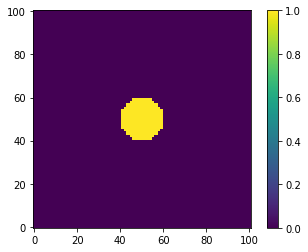

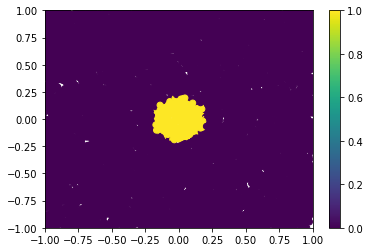

In [1]:
import numpy
import matplotlib.pyplot as plt

%pylab inline --no-import-all
numpy.random.seed(0)

# -----------------------------------------------------            
# create a regular grid

# assume the grid [-1,-1] to [1,1]
gextents = ([-1,1],[-1,1])

# number of grid points (Y,X)
gdims = (101 ,101)

# centered at the mid vertex
gcent = ( (gdims[0]-1)/2, (gdims[1]-1)/2 )

# (dy,dx)
gdx = ((gextents[0][1]-gextents[0][0]) / (gdims[0]-1.), 
       (gextents[1][1]-gextents[1][0]) / (gdims[1]-1.))

print 'grid =', gextents, gdims, gdx
print 'gcent =', gcent

# -----------------------------------------------------            
# create a function on regular grid and some unstructured points 

k = 0.2

f = numpy.zeros(gdims)
for y in xrange(gdims[0]):
    for x in xrange(gdims[1]):
        
        p = [gdx[0]*(y-gcent[0]), gdx[1]*(x-gcent[1])]
        if numpy.linalg.norm(p) < k:
            f[y,x] = 1

print 'f =', f.shape, f.min(), f.max()

# display the function
fig = plt.figure()
plt.imshow(f, origin='lower')
plt.colorbar()

# -----------------------------------------------------            
# unstructured points
n_points = gdims[0]*gdims[1]
ux = numpy.random.rand(n_points, 2)

# translate from [0,1] to gextents
for d in xrange(2):
    ux[:,d] = ux[:,d]*(gextents[d][1]-gextents[d][0]) + gextents[d][0]
print 'ux =', ux.shape, ux.min(), ux.max()


uf = numpy.zeros(n_points)
srad = numpy.linalg.norm(ux, axis=1)
uf[ srad < k ] = 1
print 'uf =', uf.shape, uf.min(), uf.max()

# display the function
fig = plt.figure()
plt.scatter(ux[:,0], ux[:,1], c=uf)
plt.colorbar()
plt.xlim(gextents[1][0], gextents[1][1])
plt.ylim(gextents[0][0], gextents[0][1])


plt.show()

PoissonSolver: 2 D grid = (101, 101) with spacings (0.02, 0.02)

Initializing Poisson solver, type = F
  - creating distance kernel: (201, 201) 0.01 2.82843  [[ elapsed time: 0.001 sec. ]]
  - computing the Green's function: (201, 201) -0.732936 0.165477  [[ elapsed time: 0.800 milli-sec. ]]
Poisson solver initialized  [[ elapsed time: 0.002 sec. ]]
	solution of frequency convolution = (101, 101) -0.0412047223806 0.00672935431898
     Initializing 2 D mesh with 10201 vertices... 
      creating Delaunay mesh...
 Done! created 20374 simplices
     Computing point areas/volumes...  Done!  [[ elapsed time: 0.842 sec. ]]
     Computing adjacent_faces... Done!  [[ elapsed time: 0.089 sec. ]]
     Computing across_edge...  Done!  [[ elapsed time: 0.452 sec. ]]
     Computing the boundary...  Done! found 26 boundary edges  [[ elapsed time: 0.057 sec. ]]
 Done!  [[ elapsed time: 1.514 sec. ]]
initialized SMesh and computed point volumes (10201,)
PoissonSolver 2 D points = (10201, 2)

Initializ

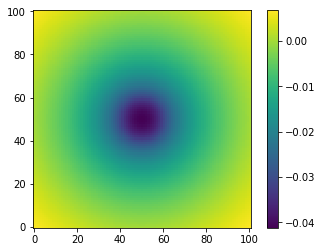

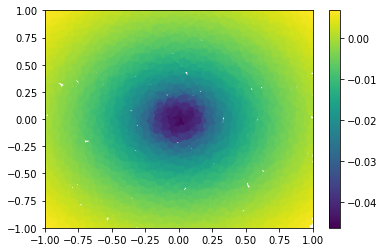

In [2]:
from pynhhd import nPoisson, UnstructuredGrid

# -----------------------------------------------------            
# regular grid solver

fsolver = nPoisson.PoissonSolver(solver='F', grid=gdims, spacings=gdx) # F solver is default
fsolver.prepare(True)
fp = fsolver.solve(f)

print '\tsolution of frequency convolution =', fp.shape, fp.min(), fp.max()

fig = plt.figure()
plt.imshow(fp, origin='lower')
plt.colorbar()

# -----------------------------------------------------            
# smesh object computes the point volumes of a delainay triangulation
smesh = UnstructuredGrid(vertices=ux)
print 'initialized SMesh and computed point volumes', smesh.pvolumes.shape

psolver = nPoisson.PoissonSolver(points=ux, pvolumes=smesh.pvolumes)
psolver.prepare(True)
up = psolver.solve(uf)

print '\tsolution of frequency convolution =', up.shape, up.min(), up.max()

# display the function
fig = plt.figure()
plt.scatter(ux[:,0], ux[:,1], c=up)
plt.xlim(gextents[1][0], gextents[1][1])
plt.ylim(gextents[0][0], gextents[0][1])
plt.colorbar()
plt.show()
